# Sentement labelled sentences

In [1]:
import pandas as pd
import warnings as wr
wr.filterwarnings("ignore")
import os
import seaborn as sns
sns.set()
os.getcwd()
import numpy as np
import matplotlib.pyplot as plt

# Loading data

In [2]:
text=pd.read_table("C:/Users/HP/Documents/datascience/project/texr/amazon_cells_labelled.txt")

In [3]:
text.iloc[0].tolist()

['Good case, Excellent value.', 1]

In [4]:
text.head()

,So there is no way for me to plug it in here in the US unless I go by a converter.,0
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [5]:
text.rename(columns={"So there is no way for me to plug it in here in the US unless I go by a converter.":"text","0":"pos/neg"},inplace=True)

# Info

In [6]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     999 non-null    object
 1   pos/neg  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [7]:
text["pos/neg"].unique()

array([1, 0], dtype=int64)

In [8]:
text["pos/neg"].value_counts(normalize=True)

pos/neg
1    0.500501
0    0.499499
Name: proportion, dtype: float64

# separating independent and response variable

In [9]:
X=text["text"]

In [10]:
y=text["pos/neg"]

# converting text to vector form

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
v=CountVectorizer(stop_words="english")
X=v.fit_transform(X)

# Train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
v.get_feature_names_out()

array(['10', '100', '11', ..., 'yes', 'z500a', 'zero'], dtype=object)

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# training the model

In [77]:
from sklearn.naive_bayes import BernoulliNB,ComplementNB,MultinomialNB

In [78]:
NB_model=BernoulliNB(alpha=0.5,force_alpha=True)
NB_model.fit(X_train,y_train)

BernoulliNB(alpha=0.5, force_alpha=True)

# Testing/predecting values

In [79]:
y_train_preds=NB_model.predict(X_train)
y_test_preds=NB_model.predict(X_test)


# model evalution

In [80]:
from sklearn import metrics

In [81]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       349
           1       0.95      0.98      0.96       350

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [82]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       150
           1       0.76      0.83      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



<Axes: >

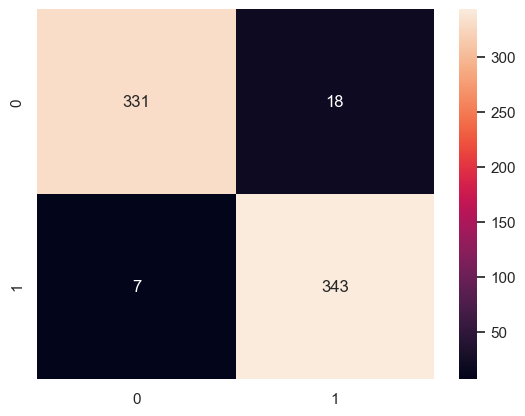

In [83]:
sns.heatmap(metrics.confusion_matrix(y_train,y_train_preds),annot=True,fmt="0.0f")

<Axes: >

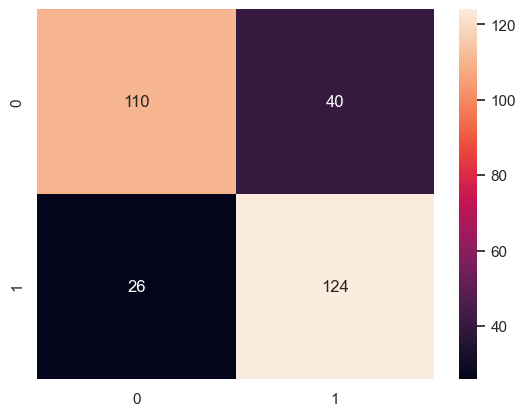

In [84]:
sns.heatmap(metrics.confusion_matrix(y_test,y_test_preds),annot=True,fmt="0.0f")

# Logistic Regresstion model

In [90]:
from sklearn.linear_model import LogisticRegression
Logit=LogisticRegression(max_iter=500)

In [91]:
Logit.fit(X_train,y_train)

LogisticRegression(max_iter=500)

# predicting / testing the model

In [92]:
y_train_preds=Logit.predict(X_train)
y_test_preds=Logit.predict(X_test)


In [93]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       349
           1       0.98      0.96      0.97       350

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



In [94]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.83      0.75      0.79       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



# all types of naive bayes

In [95]:
NB_model1=ComplementNB()
NB_model1.fit(X_train,y_train)

ComplementNB()

In [96]:
y_train_preds=NB_model1.predict(X_train)
y_test_preds=NB_model1.predict(X_test)


In [97]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.75      0.83      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [98]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       349
           1       0.93      0.97      0.95       350

    accuracy                           0.95       699
   macro avg       0.95      0.95      0.95       699
weighted avg       0.95      0.95      0.95       699



# Knn

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [107]:
y_train_preds=knn.predict(X_train)
y_test_preds=knn.predict(X_test)


In [108]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       349
           1       0.76      0.71      0.74       350

    accuracy                           0.74       699
   macro avg       0.74      0.74      0.74       699
weighted avg       0.74      0.74      0.74       699



In [109]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       150
           1       0.70      0.73      0.72       150

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



In [110]:
error_rate=[]
for i in range(1,50):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i=KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != np.array( y_test)))

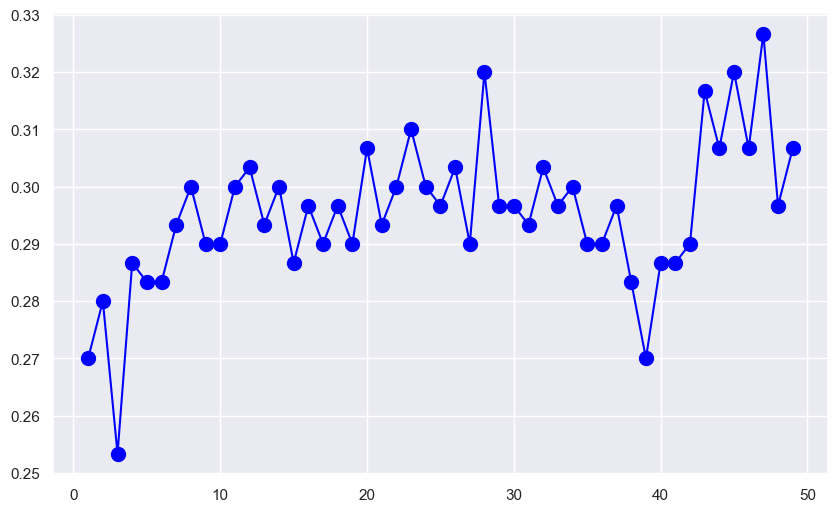

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color="blue",marker="o",markersize=10)

# RandomForest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [114]:
y_train_preds=forest.predict(X_train)
y_test_preds=forest.predict(X_test)


In [115]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       349
           1       0.99      1.00      1.00       350

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699



In [116]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77       150
           1       0.80      0.69      0.74       150

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



# Gradientbosting`

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
h=15, n_estimators=150, random_state=42;, score=0.740

In [141]:
boost=GradientBoostingClassifier(n_estimators=150,max_depth=15,random_state=42)
boost.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=15, n_estimators=150, random_state=42)

In [142]:
y_train_preds=boost.predict(X_train)
y_test_preds=boost.predict(X_test)


In [143]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       150
           1       0.80      0.73      0.76       150

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [144]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.99      0.99      0.99       350

    accuracy                           0.99       699
   macro avg       0.99      0.99      0.99       699
weighted avg       0.99      0.99      0.99       699



# hybrid approch to over come overfitting algo

In [122]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
svc=SVC()

In [123]:
voting_model=VotingClassifier(estimators=[("boost",boost),("bernouli",NB_model)],verbose=True)

In [145]:
voting_model.fit(X_train,y_train)

[Voting] .................... (1 of 2) Processing boost, total=   2.0s
[Voting] ................. (2 of 2) Processing bernouli, total=   0.0s


VotingClassifier(estimators=[('boost',
                              GradientBoostingClassifier(max_depth=12,
                                                         random_state=42)),
                             ('bernouli',
                              BernoulliNB(alpha=0.5, force_alpha=True))],
                 verbose=True)

In [146]:
y_train_preds=voting_model.predict(X_train)
y_test_preds=voting_model.predict(X_test)


In [147]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       349
           1       0.99      0.97      0.98       350

    accuracy                           0.98       699
   macro avg       0.98      0.98      0.98       699
weighted avg       0.98      0.98      0.98       699



In [148]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       150
           1       0.86      0.65      0.74       150

    accuracy                           0.77       300
   macro avg       0.79      0.77      0.77       300
weighted avg       0.79      0.77      0.77       300



# SVC

In [128]:
svc.fit(X_train,y_train)

SVC()

In [129]:
y_train_preds=svc.predict(X_train)
y_test_preds=svc.predict(X_test)


In [130]:
print(metrics.classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       150
           1       0.86      0.63      0.73       150

    accuracy                           0.76       300
   macro avg       0.78      0.76      0.76       300
weighted avg       0.78      0.76      0.76       300



In [131]:
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       349
           1       0.99      0.95      0.97       350

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



# hyper parameter tuning for navie_bayes

In [132]:
from sklearn.model_selection import GridSearchCV
parama={"alpha":[0.01,0.5,0.1,0.02,2,1.5],"force_alpha":[True,"warn",None]}


In [133]:
bernoulNb_cv=GridSearchCV(estimator=NB_model,param_grid=parama,cv=10,verbose=3,return_train_score=True)
bernoulNb_cv.fit(X,y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END alpha=0.01, force_alpha=True;, score=(train=0.977, test=0.790) total time=   0.0s
[CV 2/10] END alpha=0.01, force_alpha=True;, score=(train=0.977, test=0.820) total time=   0.0s
[CV 3/10] END alpha=0.01, force_alpha=True;, score=(train=0.977, test=0.870) total time=   0.0s
[CV 4/10] END alpha=0.01, force_alpha=True;, score=(train=0.973, test=0.790) total time=   0.0s
[CV 5/10] END alpha=0.01, force_alpha=True;, score=(train=0.976, test=0.780) total time=   0.0s
[CV 6/10] END alpha=0.01, force_alpha=True;, score=(train=0.972, test=0.800) total time=   0.0s
[CV 7/10] END alpha=0.01, force_alpha=True;, score=(train=0.978, test=0.660) total time=   0.0s
[CV 8/10] END alpha=0.01, force_alpha=True;, score=(train=0.978, test=0.760) total time=   0.0s
[CV 9/10] END alpha=0.01, force_alpha=True;, score=(train=0.977, test=0.830) total time=   0.0s
[CV 10/10] END alpha=0.01, force_alpha=True;, score=(train=0.977, test=0.

GridSearchCV(cv=10, estimator=BernoulliNB(alpha=0.5, force_alpha=True),
             param_grid={'alpha': [0.01, 0.5, 0.1, 0.02, 2, 1.5],
                         'force_alpha': [True, 'warn', None]},
             return_train_score=True, verbose=3)

In [134]:
bernoulNb_cv.best_params_

{'alpha': 0.5, 'force_alpha': True}

In [135]:
bernoulNb_cv.best_score_

0.8017575757575758

# tuning for gradient

In [136]:
GradientBoostingClassifier()
param={"n_estimators":[100,150,200] , "random_state":[42,101],"max_depth":[10,12,15]}
gradient_cv=GridSearchCV(estimator=boost,param_grid=param,verbose=3,cv=10)

In [137]:
gradient_cv.fit(X,y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.810 total time=   2.0s
[CV 2/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.840 total time=   2.0s
[CV 3/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.810 total time=   2.1s
[CV 4/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.790 total time=   2.1s
[CV 5/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.820 total time=   2.1s
[CV 6/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.770 total time=   1.9s
[CV 7/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.760 total time=   1.9s
[CV 8/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.720 total time=   2.0s
[CV 9/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.800 total time=   2.1s
[CV 10/10] END max_depth=10, n_estimators=100, random_state=42;, score=0.808 total

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=12,
                                                  random_state=42),
             param_grid={'max_depth': [10, 12, 15],
                         'n_estimators': [100, 150, 200],
                         'random_state': [42, 101]},
             verbose=3)

In [138]:
gradient_cv.best_score_

0.800818181818182

In [139]:
gradient_cv.best_params_

{'max_depth': 12, 'n_estimators': 150, 'random_state': 101}